In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Данные

Однажды был проведён такой эксперимент - на 5000 участниках проверяли, как возраст и физическое здоровье влияют на потерю слуха, особенно на способность слышать высокие тона. Результаты этого эксперимента находятся в .csv-файле. У каждого участника есть возраст, оценка его физического здоровья, и результат аудио-теста (прошёл/не прошёл), проверяющего способность слышать высокие частоты. Сможем ли мы построить модель, которая будет предсказывать способность человека слышать высокие тона звука, основываясь только на его возрасте и физическом здоровье?

* Признаки

    * age - возраст участников, в годах
    * physical_score - оценка физического здоровья, полученная в результате физических тестов

* Целевая переменная (Label/Target)

    * test_result - 0 если аудио-тест не пройден, 1 если аудио-тест пройден

In [3]:
df = pd.read_csv('../DATA/hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

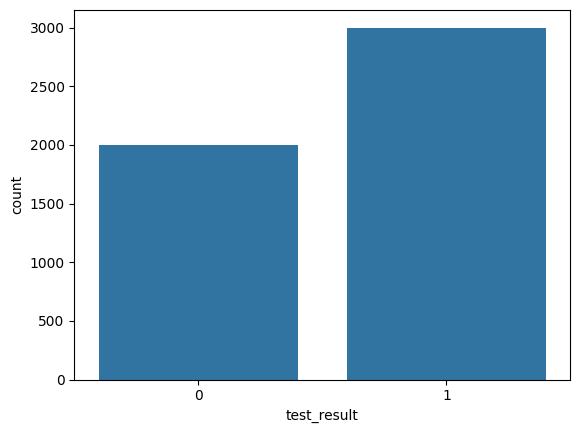

In [9]:
sns.countplot(data=df, x='test_result');

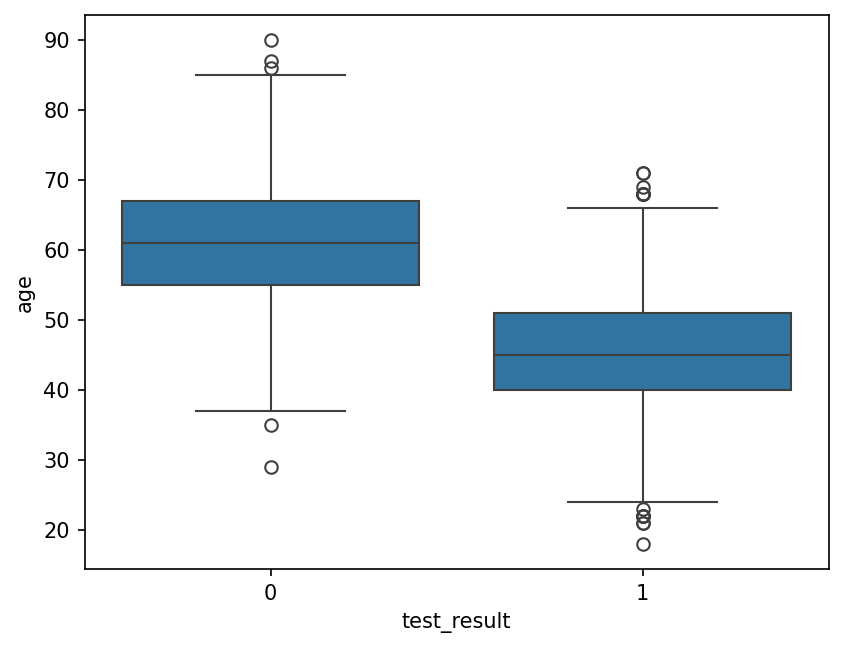

In [13]:
plt.figure(dpi=150)
sns.boxplot(data=df, x='test_result', y='age');

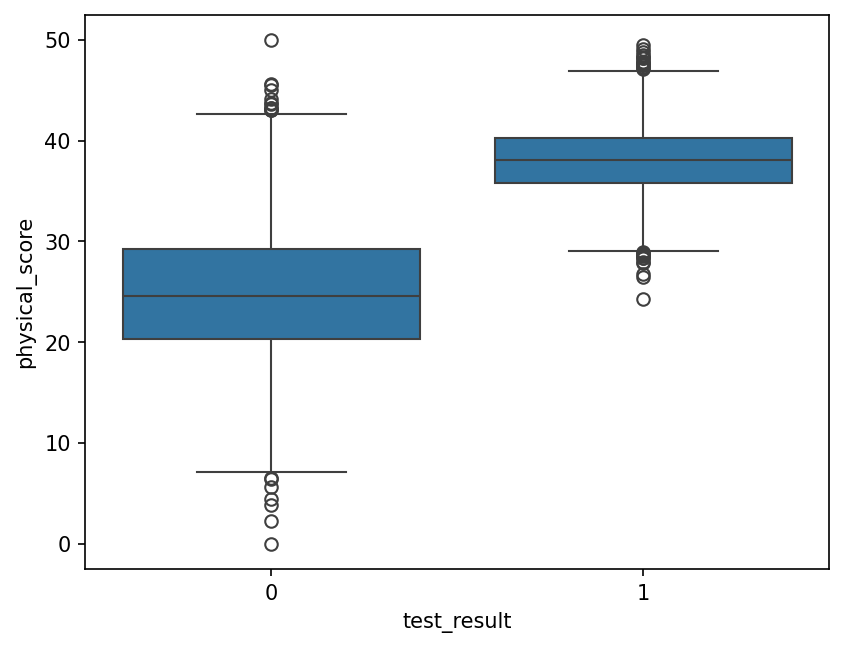

In [14]:
plt.figure(dpi=150)
sns.boxplot(data=df, x='test_result', y='physical_score');

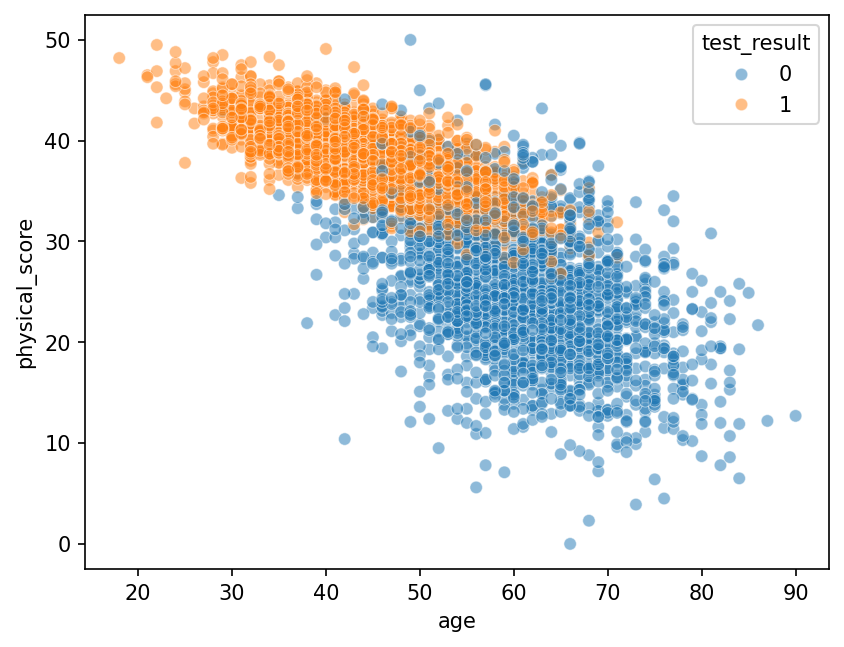

In [25]:
plt.figure(dpi=150)
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.5);

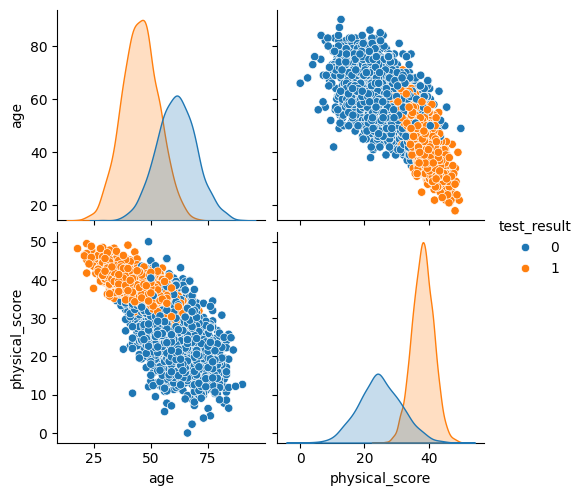

In [24]:
sns.pairplot(df, hue='test_result');

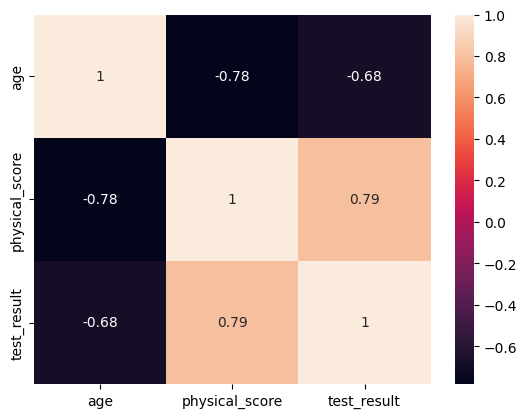

In [23]:
sns.heatmap(df.corr(), annot=True);

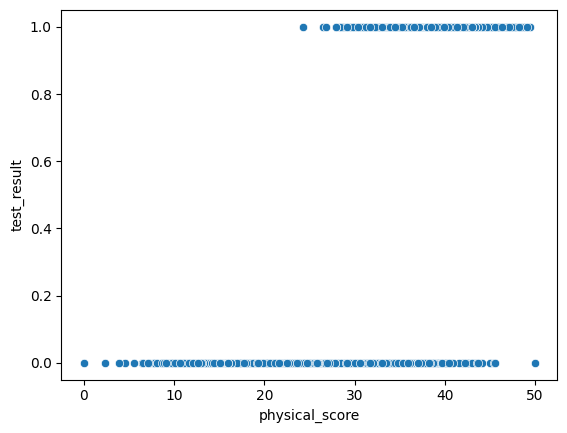

In [22]:
sns.scatterplot(data=df, x='physical_score', y='test_result');

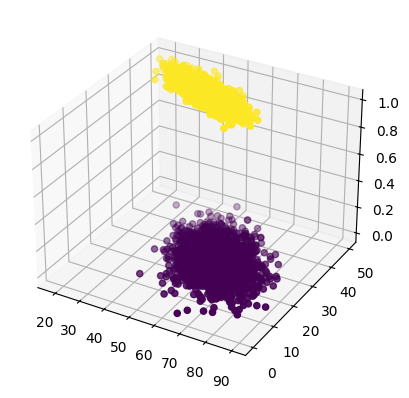

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df['age'], ys=df['physical_score'], zs=df['test_result'], c=df['test_result']);  # c = hue

In [30]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression

help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be converted
 |  (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solvers s

In [33]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

log_model.coef_

array([[-0.91707661,  3.45211325]])

In [34]:
y_pred = log_model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [35]:
# вероятности

y_pred_proba = log_model.predict_proba(X_test)
y_pred_proba

array([[2.42259273e-02, 9.75774073e-01],
       [2.69174142e-02, 9.73082586e-01],
       [9.88660978e-01, 1.13390220e-02],
       ...,
       [9.99188537e-01, 8.11462744e-04],
       [1.19849285e-01, 8.80150715e-01],
       [9.16600689e-02, 9.08339931e-01]])

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
pd.DataFrame(conf_matrix, index=['Pos','Neg'], columns=['Pos','Neg'])

0.9206666666666666


,Pos,Neg
Pos,515,82
Neg,37,866


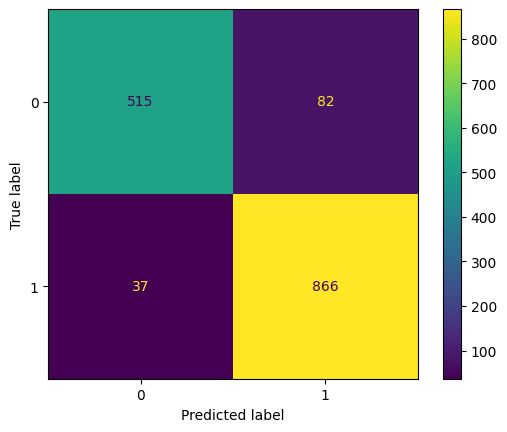

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=log_model, X=X_test, y=y_test);

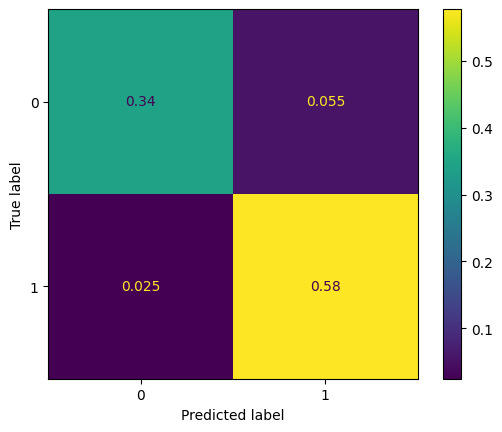

In [52]:
ConfusionMatrixDisplay.from_estimator(estimator=log_model, X=X_test, y=y_test, normalize='all');

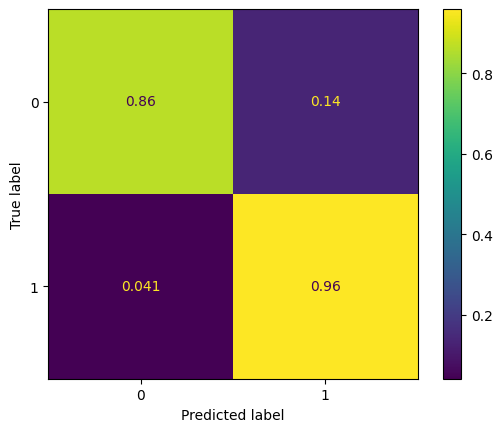

In [53]:
ConfusionMatrixDisplay.from_estimator(estimator=log_model, X=X_test, y=y_test, normalize='true');

In [58]:
print(classification_report(y_test, y_pred))

# macro avg - обычное среднее
# weighted avg - усреднение взвешанное с учетом кол-во случаев в каждом из классов (полезно, когда классы сильно несбалансированы).

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       597
           1       0.91      0.96      0.94       903

    accuracy                           0.92      1500
   macro avg       0.92      0.91      0.92      1500
weighted avg       0.92      0.92      0.92      1500



In [62]:
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')

Recall: 0.96
Precision: 0.91
F1: 0.94


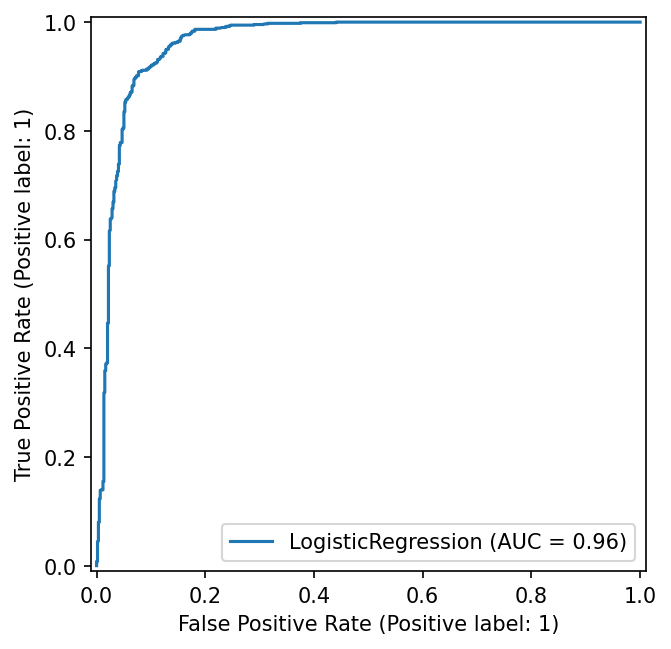

In [65]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(dpi=150)
RocCurveDisplay.from_estimator(estimator=log_model, X=X_test, y=y_test, ax=ax)

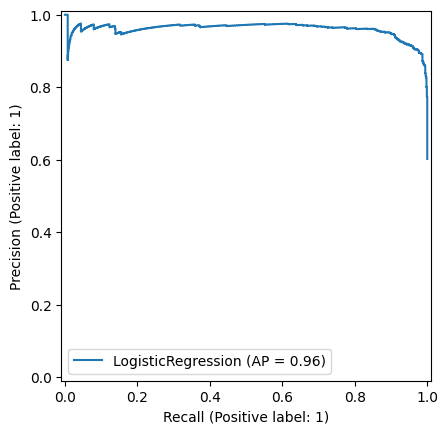

In [67]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(estimator=log_model, X=X_test, y=y_test)

In [69]:
log_model.predict_proba(X_test)[0]

array([0.02422593, 0.97577407])

In [70]:
y_test[0]

np.int64(1)